<a href="https://colab.research.google.com/github/AntonGitOrlov/Data_Science/blob/main/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_%D0%A1%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%9E%D1%80%D0%BB%D0%BE%D0%B2%D0%90%D0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цель блокнота

Рассмотрение задачи регрессии для прохождения промежуточной атестации по 3 модулю

В этом блокноте мы научимся

* скачивать данные по ссылке и распаковывать их в среде google colab
* объединять табличные данные по ключам c использованием функций JOIN

А так же закрепим навыки обучения модели машинного обучения, предварительной оценки и подготовки данных с предсказаниями

# Задача

**Предсказание успеваемости студентов**
Вам предстоит попробовать себя в оценке данных успеваемости студентов при взаимодействии в электронной среде. Кто сколько баллов наберет в итоге.

**Acknowledgements**
Авторы набора данных: Kuzilek J., Hlosta M., Zdrahal Z. Open University Learning Analytics dataset Sci. Data 4:170171 doi: 10.1038/sdata.2017.171 (2017).

# Скачиваем Данные

In [1]:
#↓ "скачай" + ссылка на скачивание
!wget https://github.com/dayekb/mpti_ml/raw/main/competition/data.zip

--2024-12-01 08:32:13--  https://github.com/dayekb/mpti_ml/raw/main/competition/data.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dayekb/mpti_ml/main/competition/data.zip [following]
--2024-12-01 08:32:14--  https://raw.githubusercontent.com/dayekb/mpti_ml/main/competition/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47117149 (45M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  44.93M   248MB/s    in 0.2s    

2024-12-01 08:32:16 (248 MB/s) - ‘data.zip’ saved [47117149/47117149]



Распаковываем архив "на месте"

In [2]:
#↓ "распакуй" + имя архива
!unzip -o data.zip

Archive:  data.zip
  inflating: assessments.csv         
  inflating: courses.csv             
  inflating: studentInfo.csv         
  inflating: studentRegistration.csv  
  inflating: studentVle.csv          
  inflating: vle.csv                 
  inflating: studentAssessment.csv   


# Загружаем данные в Pandas

In [3]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

In [4]:
# загружаем данные
ass = pd.read_csv('/content/assessments.csv')
courses = pd.read_csv('/content/courses.csv')
results = pd.read_csv('/content/studentAssessment.csv')
info = pd.read_csv('/content/studentInfo.csv')
reg = pd.read_csv('/content/studentRegistration.csv')
vle = pd.read_csv('/content/studentVle.csv')
materials = pd.read_csv('/content/vle.csv')

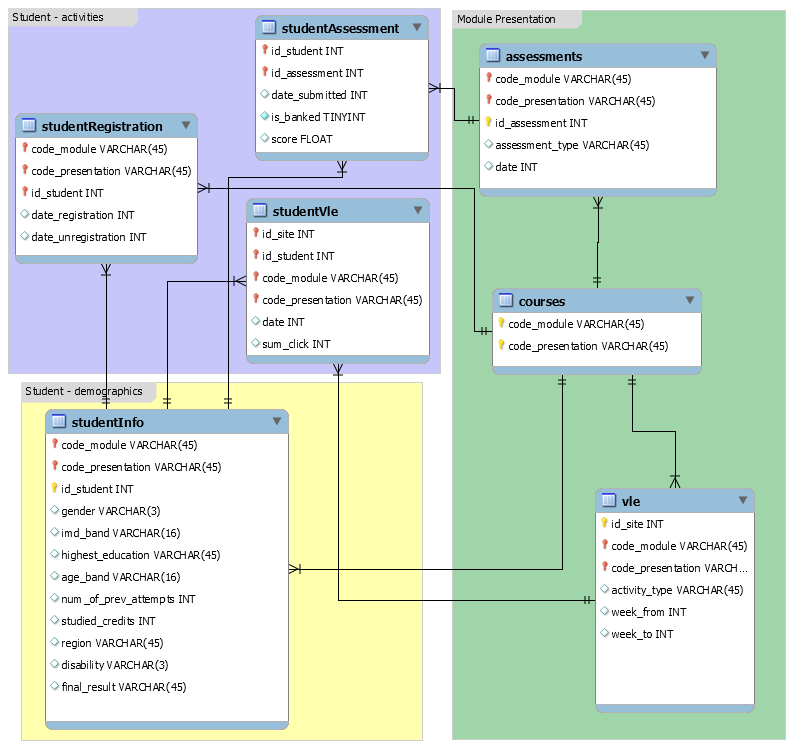

## Assessments info (информация об оценках)

1. **code_module** – идентификационный код модуля, которому принадлежит оценка.
2. **code_presentation** - идентификационный код презентации, к которой относится оценка.
3. **id_assessment** – идентификационный номер оценки.
4. **assessment_type** – вид оценки. Существует три типа оценок: оцениваемая репетитором (TMA), компьютерная оцениваемая оценка (CMA) и итоговый экзамен (Exam).
5. **date** – информация об окончательной дате сдачи оценки, рассчитанная как количество дней с момента начала модуля-презентации. Дата начала презентации имеет номер 0 (ноль).
6. **weight** - вес оценки в %. Обычно Экзамены обрабатываются отдельно и имеют вес 100%; сумма всех остальных оценок равна 100%.

In [5]:
ass.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


Чтобы потом не путаться спрячем id-шники в тип данных "объект"

In [6]:
ass['id_assessment'] = ass['id_assessment'].astype(object)

In [7]:
ass.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


## Assessments results (результаты оценки)



1. **id_assessment** – идентификационный номер оценки.
2. **id_student** –уникальный идентификационный номер студента.
3. **date_submitted** – дата представления студентом, измеряемая как количество дней с начала презентации модуля.
4. **is_banked** – флаг состояния, указывающий, что результат оценки был перенесен из предыдущей презентации.

In [8]:
results.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   id_assessment   173912 non-null  int64
 1   id_student      173912 non-null  int64
 2   date_submitted  173912 non-null  int64
 3   is_banked       173912 non-null  int64
dtypes: int64(4)
memory usage: 5.3 MB


In [9]:
results['id_assessment'] = results['id_assessment'].astype(object)
results['id_student'] = results['id_student'].astype(object)

In [10]:
results.head()  # Метод .head() - первые 5 строк

,id_assessment,id_student,date_submitted,is_banked
0,1752,11391,18,0
1,1752,28400,22,0
2,1752,31604,17,0
3,1752,32885,26,0
4,1752,38053,19,0


## Courses info (информация о курсах)

1. **code_module** – кодовое имя модуля, которое служит идентификатором.
2. **code_presentation** – кодовое название презентации. Он состоит из года и «B» для презентации, начинающейся в феврале, и «J» для презентации, начинающейся в октябре.
3. **module_presentation_length** - длина модуля-презентации в днях.

In [11]:
courses.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [12]:
courses.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


## Student registration (регистрация студентов)

1. **code_module** – идентификационный код модуля.
2. **code_presentation** - идентификационный код презентации.
3. **id_student** – уникальный идентификационный номер студента.
4. **date_registration** – дата регистрации студента на презентацию модуля, это количество дней, измеренное относительно начала презентации модуля (например, отрицательное значение -30 означает, что студент зарегистрировался на презентацию модуля за 30 дней до ее начала).

In [13]:
reg.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        32593 non-null  object 
 1   code_presentation  32593 non-null  object 
 2   id_student         32593 non-null  int64  
 3   date_registration  32548 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1018.7+ KB


Чтобы потом не путаться спрячем id-шники в тип данных "объект"

In [14]:
reg['id_student'] = reg['id_student'].astype(object)

In [15]:
reg.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,date_registration
0,AAA,2013J,11391,-159.0
1,AAA,2013J,28400,-53.0
2,AAA,2013J,30268,-92.0
3,AAA,2013J,31604,-52.0
4,AAA,2013J,32885,-176.0


## VLE resources

1. **id_site** - идентификационный номер материала.
2. **code_module** – идентификационный код модуля.
3. **code_presentation** - идентификационный код презентации.
4. **activity_type** – роль, связанная с материалом модуля.
5. **week_from** – неделя, с которой планируется использовать материал.
6. **week_to** – неделя, до которой планируется использовать материал.

In [16]:
materials.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


Чтобы потом не путаться спрячем id-шники в тип данных "объект"

In [17]:
materials['id_site'] = materials['id_site'].astype(object)

In [18]:
materials.head() # Метод .head() - первые 5 строк

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


## VLE Interactions

1. **code_module** – идентификационный код модуля.
2. **code_presentation** - идентификационный код презентации.
3. **id_student** – уникальный идентификационный номер студента.
4. **id_site** - идентификационный номер материала VLE.
5. **date** – дата взаимодействия студента с материалом измеряется как количество дней с начала модуля-презентации.
6. **sum_click** – сколько раз учащийся взаимодействовал с материалом в этот день.

In [19]:
vle.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


Чтобы потом не путаться спрячем id-шники в тип данных "объект"

In [20]:
vle['id_student'] = vle['id_student'].astype(object)
vle['id_site'] = vle['id_site'].astype(object)

In [21]:
vle.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [22]:
###
merge_vle_materials = pd.merge(vle, materials, on=['code_module', 'code_presentation', 'id_site'], how='inner')

group_result = merge_vle_materials.groupby(['code_module', 'code_presentation', 'id_student']).agg({'sum_click': 'sum', # кол-во взаимодейтсвий с материалом суммарно
                                                                                   'date': 'min', # насколько рано начал
                                                                                   'id_site': 'count', # кол-во используемых материалов
                                                                                   'activity_type': 'nunique' # кол-во уникальных видов ресурсов
                                                                                   })
group_result

sum_click  date  id_site  \
code_module code_presentation id_student                             
AAA         2013J             11391             934    -5      196   
                              28400            1435   -10      430   
                              30268             281   -10       76   
                              31604            2158   -10      663   
                              32885            1034   -10      352   
...                                             ...   ...      ...   
GGG         2014J             2640965            41    -4       19   
                              2645731           893    19      237   
                              2648187           312   -10      108   
                              2679821           275   -14       61   
                              2684003           616   -15      181   

                                          activity_type  
code_module code_presentation id_student                 
AAA         2013J             11391                   6  
                              28400                   7  
                              30268                   6  
                              31604                   8  
                              32885                   7  
...                                                 ...  
GGG         2014J             2640965                 4  
                              2645731                 7  
                              2648187                 6  
                              2679821                 6  
                              2684003                 6  

[29228 rows x 4 columns]

In [23]:
###
group_result.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 29228 entries, ('AAA', '2013J', 11391) to ('GGG', '2014J', 2684003)
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   sum_click      29228 non-null  int64
 1   date           29228 non-null  int64
 2   id_site        29228 non-null  int64
 3   activity_type  29228 non-null  int64
dtypes: int64(4)
memory usage: 1.2+ MB


## Student information

1. **code_module** – идентификационный код модуля, на котором зарегистрирован студент.
2. **code_presentation** - идентификационный код презентации, во время которой студент регистрируется на модуле.
3. **id_student** – уникальный идентификационный номер студента.
4. **gender** – пол ученика.
5. **region** – определяет географический регион, в котором студент проживал во время прохождения модуля-презентации.
6. **highest_education** – самый высокий уровень образования студента при поступлении на модульную презентацию.
7. **imd_band** – задает диапазон [Index of Multiple Depravation](https://en.wikipedia.org/wiki/Multiple_deprivation_index#:~:text=Indices%20of%20multiple%20deprivation%20(IMD,a%20single%20score%20of%20deprivation.) места, где студент проживал во время модуля-презентации. (насколько бедный район, короче)
8. **age_band** – диапазон студенческого возраста.
9. **num_of_prev_attempts** – количество раз, когда учащийся пытался пройти этот модуль.
10. **studied_credits** – общее количество кредитов по модулям, которые студент изучает в настоящее время.
11. **disability** – указывает, признан ли студент инвалидом.

In [24]:
info.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


Чтобы потом не путаться спрячем id-шники в тип данных "объект"

In [25]:
info['id_student'] = info['id_student'].astype(object)

In [26]:
info.head()  # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N


# Как можно объединять данные

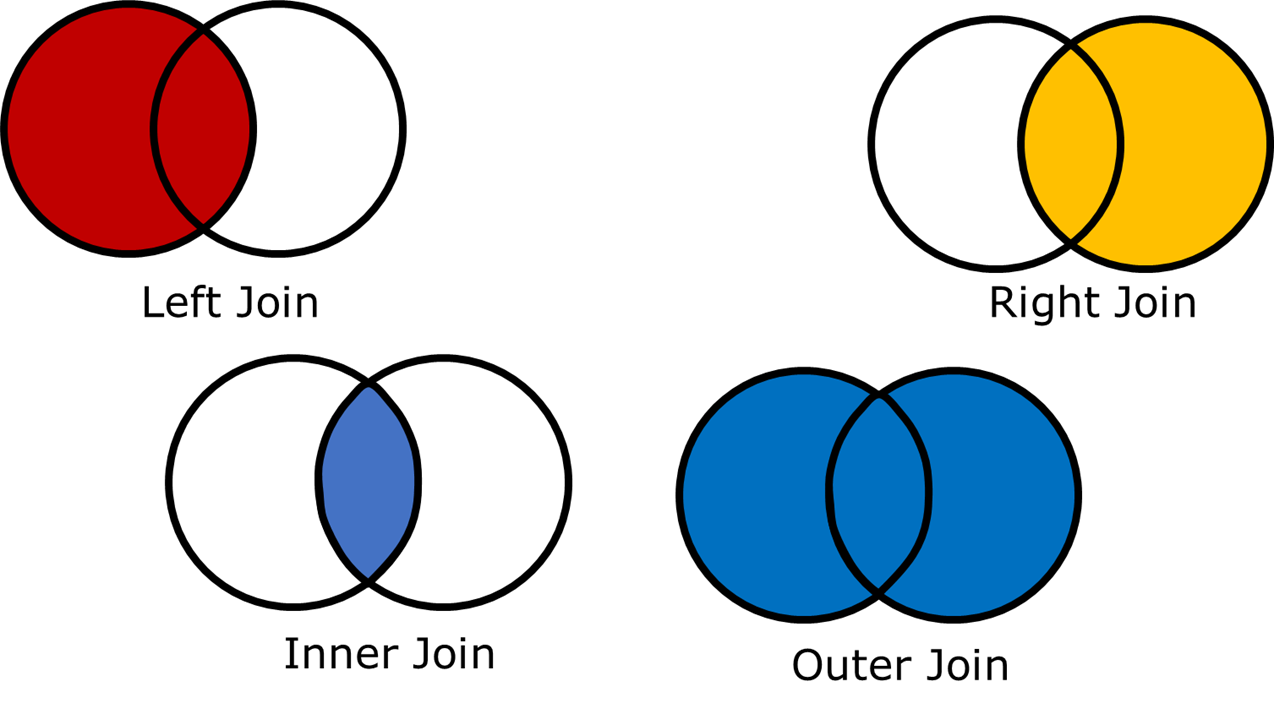

Если мы просто смотрим что можно объединить (в плане признаков), то наверное лучше воспользоваться Inner Join (т.е. только то что есть в обоих фреймах)


## Регистрация + Информация о курсах

In [27]:
#                                     ↓ по каким колонкам буддем объединять     ↓ как
regCourses = pd.merge(reg, courses, on=['code_module', 'code_presentation'], how='inner')

regCourses.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length
0,AAA,2013J,11391,-159.0,268
1,AAA,2013J,28400,-53.0,268
2,AAA,2013J,30268,-92.0,268
3,AAA,2013J,31604,-52.0,268
4,AAA,2013J,32885,-176.0,268


## Регистрация + Информация о курсах + Инфа о студентах

In [28]:
#                                     ↓ по каким колонкам буддем объединять                       ↓ как
regCoursesInfo = pd.merge(regCourses, info, on=['code_module', 'code_presentation', 'id_student'], how='inner')

regCoursesInfo.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N


In [29]:
###
regCoursesInfoGroup = pd.merge(regCoursesInfo, group_result, on=['code_module', 'code_presentation', 'id_student'], how='inner')

regCoursesInfoGroup

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,sum_click,date,id_site,activity_type
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934,-5,196,6
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,1435,-10,430,7
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,281,-10,76,6
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,2158,-10,663,8
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,1034,-10,352,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29223,GGG,2014J,2640965,-4.0,269,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,41,-4,19,4
29224,GGG,2014J,2645731,-23.0,269,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,893,19,237,7
29225,GGG,2014J,2648187,-129.0,269,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,312,-10,108,6
29226,GGG,2014J,2679821,-49.0,269,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,275,-14,61,6


In [30]:
###
regCoursesInfoGroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29228 entries, 0 to 29227
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 29228 non-null  object 
 1   code_presentation           29228 non-null  object 
 2   id_student                  29228 non-null  object 
 3   date_registration           29221 non-null  float64
 4   module_presentation_length  29228 non-null  int64  
 5   gender                      29228 non-null  object 
 6   region                      29228 non-null  object 
 7   highest_education           29228 non-null  object 
 8   imd_band                    28174 non-null  object 
 9   age_band                    29228 non-null  object 
 10  num_of_prev_attempts        29228 non-null  int64  
 11  studied_credits             29228 non-null  int64  
 12  disability                  29228 non-null  object 
 13  sum_click                   292

# Выделение тренировочной и тестовой выборки

Список студентов, соответсвующих модулей и презентаций (разные студенты могут сдавать разные модули)

In [31]:
Train_Who = pd.read_csv('https://raw.githubusercontent.com/dayekb/mpti_ml/main/competition/Train_Who.csv')
Test_Who = pd.read_csv('https://raw.githubusercontent.com/dayekb/mpti_ml/main/competition/Test_Who.csv')

А вот тут Left Join по всему содержимому `Train_Who`

Потому что мы не хотим ничего упустить оттуда

In [32]:
#                                               ↓ по каким колонкам буддем объединять               ↓ как
Train = pd.merge(Train_Who, regCoursesInfoGroup, on=['id_student', 'code_module', 'code_presentation'], how='left')
# Прячем "наш" id в index фрейма
Train.index = Train.id
# удаляем как столбец, ибо зачем
Train.drop(columns = ['id'], inplace = True)
Train.head()

,id_student,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,sum_click,date,id_site,activity_type
id,,,,,,,,,,,,,,,,,
0,464685,DDD,2014B,-36.0,241.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1.0,70.0,N,1694.0,-16.0,595.0,9.0
1,606593,DDD,2013J,-32.0,261.0,M,Scotland,A Level or Equivalent,20-30%,0-35,0.0,120.0,N,692.0,-18.0,327.0,9.0
2,1674799,CCC,2014J,-21.0,269.0,M,South Region,HE Qualification,70-80%,55<=,0.0,60.0,N,1963.0,-18.0,641.0,9.0
3,195246,FFF,2014J,-124.0,269.0,M,West Midlands Region,Lower Than A Level,10-20,0-35,0.0,60.0,N,2138.0,-18.0,719.0,12.0
4,582080,FFF,2013J,-114.0,268.0,M,South East Region,Lower Than A Level,10-20,35-55,0.0,60.0,N,188.0,-18.0,82.0,8.0


In [33]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26074 entries, 0 to 26073
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  26074 non-null  object 
 1   code_module                 26074 non-null  object 
 2   code_presentation           26074 non-null  object 
 3   date_registration           23360 non-null  float64
 4   module_presentation_length  23364 non-null  float64
 5   gender                      23364 non-null  object 
 6   region                      23364 non-null  object 
 7   highest_education           23364 non-null  object 
 8   imd_band                    22521 non-null  object 
 9   age_band                    23364 non-null  object 
 10  num_of_prev_attempts        23364 non-null  float64
 11  studied_credits             23364 non-null  float64
 12  disability                  23364 non-null  object 
 13  sum_click                   23364 no

аналогично для тестовой выборки

In [34]:
#                                               ↓ по каким колонкам буддем объединять               ↓ как
Test = pd.merge(Test_Who, regCoursesInfoGroup, on=['id_student', 'code_module', 'code_presentation'], how='left')
# Прячем "наш" id в index фрейма
Test.index = Test.id
# удаляем как столбец, ибо зачем
Test.drop(columns = ['id'], inplace = True)
Test.head()

,id_student,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,sum_click,date,id_site,activity_type
id,,,,,,,,,,,,,,,,,
26074,2588655,DDD,2014J,-92.0,262.0,M,Scotland,Lower Than A Level,50-60%,0-35,2.0,60.0,N,297.0,107.0,47.0,5.0
26075,543628,CCC,2014B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26076,387276,BBB,2013B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26077,692219,CCC,2014J,-34.0,269.0,M,South Region,A Level or Equivalent,20-30%,0-35,0.0,90.0,N,283.0,-13.0,90.0,7.0
26078,516212,BBB,2013J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6519 entries, 26074 to 32592
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  6519 non-null   object 
 1   code_module                 6519 non-null   object 
 2   code_presentation           6519 non-null   object 
 3   date_registration           5861 non-null   float64
 4   module_presentation_length  5864 non-null   float64
 5   gender                      5864 non-null   object 
 6   region                      5864 non-null   object 
 7   highest_education           5864 non-null   object 
 8   imd_band                    5653 non-null   object 
 9   age_band                    5864 non-null   object 
 10  num_of_prev_attempts        5864 non-null   float64
 11  studied_credits             5864 non-null   float64
 12  disability                  5864 non-null   object 
 13  sum_click                   5864 

# Целевая переменная

Для регрессии - это взешенная оценка отдельного **студента** за конкретную **презентацию** по конкретному **модулю**

В файле `Submission` - пример файла для загрузки

In [36]:
Target = pd.read_csv('https://raw.githubusercontent.com/dayekb/mpti_ml/main/competition/Train_Target_reg.csv', index_col = 'id')
Submission = pd.read_csv('https://raw.githubusercontent.com/dayekb/mpti_ml/main/competition/Submission_reg.csv', index_col = 'id')

In [37]:
Target.head()

,weighted_score
id,
0,64.9125
1,14.8625
2,61.4300
3,39.5000
4,9.2500


In [38]:
###
Train['weighted_score'] = Target

In [39]:
###
Train.head()

,id_student,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,sum_click,date,id_site,activity_type,weighted_score
id,,,,,,,,,,,,,,,,,,
0,464685,DDD,2014B,-36.0,241.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1.0,70.0,N,1694.0,-16.0,595.0,9.0,64.9125
1,606593,DDD,2013J,-32.0,261.0,M,Scotland,A Level or Equivalent,20-30%,0-35,0.0,120.0,N,692.0,-18.0,327.0,9.0,14.8625
2,1674799,CCC,2014J,-21.0,269.0,M,South Region,HE Qualification,70-80%,55<=,0.0,60.0,N,1963.0,-18.0,641.0,9.0,61.4300
3,195246,FFF,2014J,-124.0,269.0,M,West Midlands Region,Lower Than A Level,10-20,0-35,0.0,60.0,N,2138.0,-18.0,719.0,12.0,39.5000
4,582080,FFF,2013J,-114.0,268.0,M,South East Region,Lower Than A Level,10-20,35-55,0.0,60.0,N,188.0,-18.0,82.0,8.0,9.2500


In [40]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26074 entries, 0 to 26073
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  26074 non-null  object 
 1   code_module                 26074 non-null  object 
 2   code_presentation           26074 non-null  object 
 3   date_registration           23360 non-null  float64
 4   module_presentation_length  23364 non-null  float64
 5   gender                      23364 non-null  object 
 6   region                      23364 non-null  object 
 7   highest_education           23364 non-null  object 
 8   imd_band                    22521 non-null  object 
 9   age_band                    23364 non-null  object 
 10  num_of_prev_attempts        23364 non-null  float64
 11  studied_credits             23364 non-null  float64
 12  disability                  23364 non-null  object 
 13  sum_click                   23364 no

In [41]:
Submission.head()

,weighted_score
id,
26074,41.862562
26075,41.862562
26076,41.862562
26077,41.862562
26078,41.862562


In [42]:
###
# Test['weighted_score'] = Submission

# Делаем простое предсказание

Наверное использовать id студента - так себе вариант

Значит - удалим

In [43]:
Train.drop(columns = ['id_student'], inplace = True)
Test.drop(columns = ['id_student'], inplace = True)

пригодилось то, что мы все id-шники закинули в тип данных `object`

теперь можем "автоматически" выполнять предварительную обработку по колонкам

In [44]:
cat_columns = []
num_columns = []

for column_name in Train.columns:
    if (Train[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))



categorical columns:	  ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability'] 
 len =  8
numerical columns:	  ['date_registration', 'module_presentation_length', 'num_of_prev_attempts', 'studied_credits', 'sum_click', 'date', 'id_site', 'activity_type', 'weighted_score'] 
 len =  9


## Pipeline для предварительной обработки

In [56]:
from sklearn.impute import SimpleImputer # Объект для замены пропущенных значений

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder, TargetEncoder # Импортируем нормализацию и One-Hot Encoding от scki-kit-learn

from sklearn.model_selection import train_test_split#  функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок



**SimpleImputer** - заменяет пропуски на значения
возможные стратегии (`strategy`)


*   `'mean'` - среднее
*   `'median'` - медиана
*   `'most_frequent'` - мода
*   `'constant'` - какое-то конкретное значение (необходимо добавить параметр `fill_value='missing'`)



Создаем объект `Pipeline`

На вход ему подаем список из того, что мы хотим объединить в формате
* строка- название (даем имя Объекту)
* и сам объект (с заданными аргументами, если необходимо)

Сначала создадим отдельно Pipeline для числовых данных (вставление пропусков + нормализация)

In [46]:
###
num_pipe = Pipeline([
  ('SimpleImpute', SimpleImputer(strategy='median')),
  ('scaler', StandardScaler())
])

Предобработка категориальных данных (вставление пропусков + One-Hot кодирование)

In [90]:
###
cat_pipe_gender_education_age_disability = Pipeline([
  ('SimpleImpute', SimpleImputer(strategy='most_frequent')),
  ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # убрал drop='if_binary', когда поправил SimpleImputer
])

cat_gender_education_age_disability = ['gender', 'highest_education', 'age_band', 'disability']

In [91]:
###
cat_pipe_region_imd = Pipeline([
  ('SimpleImpute', SimpleImputer(strategy='most_frequent')),
  ('encoder', OrdinalEncoder()) # вместо порядкового кодирования OrdinalEncoder() лучше использовать целевое кодирование TargetEncoder(target_type="continuous")
                                # однако когда запускаем обучение fit() надо выделять целевую переменную
  ### хех, не менял
])

cat_region_imd = ['region', 'imd_band']

Объект `ColumnTransformer` имеет в целом схожий синтаксис с `Pipeline`

т.е. на вход ему также подаем список из того, что мы хотим объединить в формате

* строка- название (даем имя Объекту)
* сам объект (в этом случае подаем объекты Pipeline)
* добавляется еще список названий столбцов, к которым мы применяем эти преобразования


In [92]:
###
my_list = ['date_registration', 'module_presentation_length', 'num_of_prev_attempts', 'studied_credits', 'sum_click', 'date', 'id_site', 'activity_type', 'weighted_score']
my_list[:-1]

['date_registration',
 'module_presentation_length',
 'num_of_prev_attempts',
 'studied_credits',
 'sum_click',
 'date',
 'id_site',
 'activity_type']

In [89]:
###
preprocessors = ColumnTransformer(transformers=[
    ('num_columns', num_pipe, num_columns[:-1]),
    ('cat_gender_education_age_disability', cat_pipe_gender_education_age_disability, cat_gender_education_age_disability),
    ('cat_region_imd', cat_pipe_region_imd, cat_region_imd)
])

**Считываем данные, разбиваем на тренировочную и валидационную**

In [94]:
# не забываем удалить целевую переменную цену из признаков
# Train.drop(columns = ['weighted_score'], inplace=True)

# разбиваем на тренировочную и валидационную
Train_, Val, y_train, y_val = train_test_split(Train.drop(columns = ['weighted_score']), Train['weighted_score'],
                                                    test_size=0.3,
                                                    random_state=42)

In [95]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26074 entries, 0 to 26073
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 26074 non-null  object 
 1   code_presentation           26074 non-null  object 
 2   date_registration           23360 non-null  float64
 3   module_presentation_length  23364 non-null  float64
 4   gender                      23364 non-null  object 
 5   region                      23364 non-null  object 
 6   highest_education           23364 non-null  object 
 7   imd_band                    22521 non-null  object 
 8   age_band                    23364 non-null  object 
 9   num_of_prev_attempts        23364 non-null  float64
 10  studied_credits             23364 non-null  float64
 11  disability                  23364 non-null  object 
 12  sum_click                   23364 non-null  float64
 13  date                        23364 no

In [96]:
Train_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18251 entries, 20615 to 23654
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 18251 non-null  object 
 1   code_presentation           18251 non-null  object 
 2   date_registration           16351 non-null  float64
 3   module_presentation_length  16353 non-null  float64
 4   gender                      16353 non-null  object 
 5   region                      16353 non-null  object 
 6   highest_education           16353 non-null  object 
 7   imd_band                    15767 non-null  object 
 8   age_band                    16353 non-null  object 
 9   num_of_prev_attempts        16353 non-null  float64
 10  studied_credits             16353 non-null  float64
 11  disability                  16353 non-null  object 
 12  sum_click                   16353 non-null  float64
 13  date                        1635

In [97]:
Val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7823 entries, 1441 to 12687
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 7823 non-null   object 
 1   code_presentation           7823 non-null   object 
 2   date_registration           7009 non-null   float64
 3   module_presentation_length  7011 non-null   float64
 4   gender                      7011 non-null   object 
 5   region                      7011 non-null   object 
 6   highest_education           7011 non-null   object 
 7   imd_band                    6754 non-null   object 
 8   age_band                    7011 non-null   object 
 9   num_of_prev_attempts        7011 non-null   float64
 10  studied_credits             7011 non-null   float64
 11  disability                  7011 non-null   object 
 12  sum_click                   7011 non-null   float64
 13  date                        7011 n

In [98]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 18251 entries, 20615 to 23654
Series name: weighted_score
Non-Null Count  Dtype  
--------------  -----  
18251 non-null  float64
dtypes: float64(1)
memory usage: 285.2 KB


In [99]:
y_val.info()

<class 'pandas.core.series.Series'>
Index: 7823 entries, 1441 to 12687
Series name: weighted_score
Non-Null Count  Dtype  
--------------  -----  
7823 non-null   float64
dtypes: float64(1)
memory usage: 122.2 KB


"Обучаем" стандартно через `.fit()`

Тут важно, что на вход мы подаем датафреймы, т.к. в них есть колонки к которым мы обращаемся "по именам". Внимательно следите за названиями колонок, он проверяет всё добуквенно

In [120]:
###
preprocessors.fit(Train_, y=y_train)

###
# y_train и y_val были множествами, а не датафреймами
# в preprocessors был weighted_score в num_columns, а не должно. Удалил.

ColumnTransformer(transformers=[('num_columns',
                                 Pipeline(steps=[('SimpleImpute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['date_registration',
                                  'module_presentation_length',
                                  'num_of_prev_attempts', 'studied_credits',
                                  'sum_click', 'date', 'id_site',
                                  'activity_type']),
                                ('cat_gender_education_age_disability',
                                 Pipeline(steps=[('SimpleImpute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender', 'highest_education', 'age_band',
                                  'disability']),
                                ('cat_region_imd',
                                 Pipeline(steps=[('SimpleImpute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 ['region', 'imd_band'])])

In [102]:
###
preprocessors.transformers_[1][1]['encoder'].get_feature_names_out(cat_gender_education_age_disability)

array(['gender_F', 'gender_M', 'highest_education_A Level or Equivalent',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'age_band_0-35',
       'age_band_35-55', 'age_band_55<=', 'disability_N', 'disability_Y'],
      dtype=object)

In [106]:
###
cat_gender_education_age_disability_names = preprocessors.transformers_[1][1]['encoder'].get_feature_names_out(cat_gender_education_age_disability)

# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num_columns[:-1],
                     cat_gender_education_age_disability_names,
                     cat_region_imd])

In [107]:
###
Train_transformed = preprocessors.transform(Train_)

In [108]:
###
pd.DataFrame(Train_transformed, columns=columns)

,date_registration,module_presentation_length,num_of_prev_attempts,studied_credits,sum_click,date,id_site,activity_type,gender_F,gender_M,...,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y,region,imd_band
0,0.473949,0.973436,-0.313524,1.168239,-0.665506,0.445338,-0.837994,0.322244,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,5.0
1,-1.412056,0.973436,-0.313524,-1.230073,-0.746992,0.526873,-0.913232,-1.303651,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,7.0
2,0.828962,0.893656,-0.313524,-0.430636,-0.386388,-0.125405,-0.180364,-0.490704,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9.0,7.0
3,-1.855822,0.893656,-0.313524,1.168239,0.387723,-0.777682,0.811655,1.135191,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,8.0,5.0
4,-1.234550,0.893656,-0.313524,0.368801,1.966351,0.445338,1.700570,2.354612,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18246,0.274254,0.414977,-0.313524,-0.430636,-0.335916,-0.125405,-0.302973,-0.084230,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6.0,2.0
18247,-2.854295,0.893656,1.936621,-0.430636,2.145133,-0.777682,2.625711,1.541664,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0
18248,-0.502336,0.893656,-0.313524,-0.430636,-0.040379,0.771477,-0.344772,-0.490704,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,5.0
18249,0.784585,0.414977,-0.313524,-0.430636,-0.351118,-1.348425,-0.018743,-0.084230,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0


In [116]:
X_train = preprocessors.transform(Train_) # преобразуем  тренировочные данные
X_val = preprocessors.transform(Val) # преобразуем  валидационные данные
X_test = preprocessors.transform(Test) # преобразуем  тестовые данные

In [110]:
X_train.shape

(18251, 22)

## Простая регрессия

In [111]:
from sklearn.linear_model import SGDRegressor # Линейная регрессия с градиентным спуском от scikit-learn

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

from sklearn.metrics import PredictionErrorDisplay # Класс визуализации ошибок модели

Вы не поверите, но вновь

* Создаем объект-модель
* обучаем через `.fit()`

In [112]:
model = SGDRegressor(random_state=42)

model.fit(X_train, y_train);

* оценим модель на тренировочной и валидационной выборке

In [113]:
def calculate_metric(model_pipe, X, y, metric = r2_score):
    """Расчет метрики.
    Параметры:
    ===========
    model_pipe: модель или pipeline
    X: признаки
    y: истинные значения
    metric: метрика (r2 - по умолчанию)
    """
    y_model = model_pipe.predict(X)
    return metric(y, y_model)

In [114]:
print(f"r2 на тренировочной выборке: {calculate_metric(model, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model, X_val, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.4217
r2 на валидационной выборке: 0.4264
mse на тренировочной выборке: 665.8274
mse на валидационной выборке: 663.7521


* Визуализируем ошибки модели

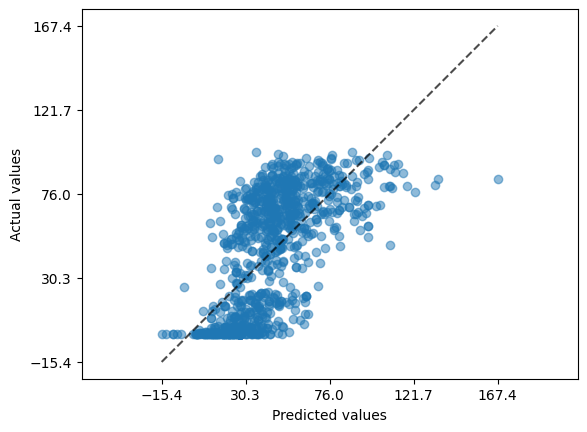

In [115]:
PredictionErrorDisplay.from_predictions(
    y_val,
    model.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

* предсказываем на тестовых данных через  `.predict()`

In [117]:
predict = model.predict(X_test)

Складываем предсказание в фрейм загрузки

In [118]:
Submission['weighted_score'] = predict

In [119]:
Submission

,weighted_score
id,
26074,42.021718
26075,27.266623
26076,27.266623
26077,14.024558
26078,27.266623
...,...
32588,15.326966
32589,33.359029
32590,57.395487


## Готовим итоговый файл

In [106]:
Submission.to_csv('/content/SGDRegression_Submission.csv',index=True)

# Идеи для улучшения результата

* выполнить EDA (исследовательский анализ данных) и найти видимые закономерности
* использовать другие агрегирующие функции для таблицы `vle`



---


* использовать другие условия для замены пропущенных значений (например, не заменять средним, а чем-то другим - например нулями / другими категориями)
* использовать более "персонифицированные" предварительные обработки данных



---


* протестировать преобразование целевой переменной
* ручная корректировка результата (например замена всех отрицательных значений в предсказании нулями)



---


* использовать более сложные модели (в том числе случайный лес)

# Самостоятельная работа

1. Добавить в данные агрегированные признаки (из [Задания 1, 2](https://colab.research.google.com/drive/1dY-nvPBioZJ_K6_erZVIDNwrPeqqkjId#scrollTo=fws81Bt9mt4b&line=1&uniqifier=1) ранее)

2. Изменить pipeline предварительной обработки (из [Задания 5](https://colab.research.google.com/drive/1dY-nvPBioZJ_K6_erZVIDNwrPeqqkjId#scrollTo=PS119CJr_wUu) ранее)

3. Обучить линейную модель на полученных данных. Проинтерпретировать результат
* оценить распределение ошибок и метрики модели
* оценить веса и значимость признаков

4. Выполнить предсказание на тестовых данных. Подготовить итоговый файл (если вам интересно как ваша модель работает на "новых" данных)

5. (со звёздочкой) Обучить более сложную модель машинного обучения на выбор.
* также выполнить интерпретацию результата
* также подготовить предсказание на тестовых данных